In [1]:
import sys
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import copy

In [54]:
n1 = 20 # cantidad de ciudades
n2 = 20  # cantidad de viajes
n3 = 5  # distancia máxima
a = 0
distance = np.zeros([n1,n1])
moves = np.zeros([n2, 2])

In [55]:
while (np.linalg.matrix_rank(a)!=n1):
    a = np.random.randint(n3, size=(n1,n1))
    np.fill_diagonal(a,0)
    a = np.tril(a) + np.tril(a, -1).T
print("Matriz de rutas: \n{}".format(a))

Matriz de rutas: 
[[0 0 3 3 3 2 0 3 2 0 3 1 2 0 3 2 1 0 2 4]
 [0 0 0 1 1 0 3 3 3 4 4 2 2 1 2 0 4 2 1 3]
 [3 0 0 2 4 2 0 2 0 4 0 1 4 1 0 4 0 2 0 4]
 [3 1 2 0 3 4 1 3 0 1 1 3 0 2 4 3 2 0 3 2]
 [3 1 4 3 0 2 3 4 1 2 3 1 2 3 4 4 4 0 3 4]
 [2 0 2 4 2 0 1 0 0 3 1 2 2 3 3 2 2 3 1 3]
 [0 3 0 1 3 1 0 2 3 1 0 2 1 4 1 3 0 0 2 4]
 [3 3 2 3 4 0 2 0 0 1 1 2 2 4 3 4 3 1 0 2]
 [2 3 0 0 1 0 3 0 0 1 3 2 2 0 4 2 1 2 1 0]
 [0 4 4 1 2 3 1 1 1 0 4 2 4 4 2 2 4 4 4 1]
 [3 4 0 1 3 1 0 1 3 4 0 0 0 1 3 2 3 1 3 2]
 [1 2 1 3 1 2 2 2 2 2 0 0 1 1 4 1 0 3 0 3]
 [2 2 4 0 2 2 1 2 2 4 0 1 0 1 2 2 2 3 1 0]
 [0 1 1 2 3 3 4 4 0 4 1 1 1 0 1 3 3 1 1 3]
 [3 2 0 4 4 3 1 3 4 2 3 4 2 1 0 1 2 1 3 4]
 [2 0 4 3 4 2 3 4 2 2 2 1 2 3 1 0 1 4 0 0]
 [1 4 0 2 4 2 0 3 1 4 3 0 2 3 2 1 0 2 1 4]
 [0 2 2 0 0 3 0 1 2 4 1 3 3 1 1 4 2 0 4 2]
 [2 1 0 3 3 1 2 0 1 4 3 0 1 1 3 0 1 4 0 2]
 [4 3 4 2 4 3 4 2 0 1 2 3 0 3 4 0 4 2 2 0]]


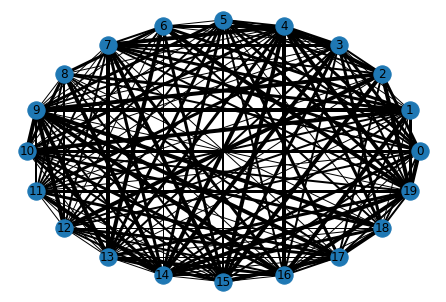

In [56]:
net1 = nx.from_numpy_matrix(copy.deepcopy(a))
net2 = nx.from_numpy_matrix(copy.deepcopy(a))
for e in net1.edges():
    net2[e[0]][e[1]]['color'] = 'black'

edge_weights_list = [net2[e[0]][e[1]]['weight'] for e in net2.edges()]
nx.draw_circular(net2, with_labels=True, width=edge_weights_list)
plt.show()

In [57]:
rng = np.random.default_rng()
for i in range(n2):
    moves[i,:] = rng.choice(n1, size=2, replace=False)
#moves = np.random.choice(n1, size=[n2, 2], replace=False)  
print("Matriz de movimientos: \n{}".format(moves))

Matriz de movimientos: 
[[15.  6.]
 [ 2. 10.]
 [ 6.  2.]
 [ 9. 10.]
 [14.  6.]
 [ 2. 11.]
 [14.  3.]
 [14. 17.]
 [ 0. 15.]
 [ 2.  5.]
 [17.  9.]
 [ 0.  4.]
 [ 7.  6.]
 [12.  3.]
 [ 6. 18.]
 [ 9.  0.]
 [ 7.  8.]
 [10. 16.]
 [ 5. 16.]
 [15. 18.]]


In [58]:
colores = []
for i in range(n2):
    color = np.base_repr(np.random.choice(16777215), base=16)
    colores.append('#{:0>6}'.format(color))

In [59]:
caminos_total = []
k_si = 0
k_no = 0
for j in range(n2):
    try:
        p = nx.dijkstra_path(net1,int(moves[j,0]),int(moves[j,1]))
        #p = nx.shortest_path(net1,int(moves[j,0]),int(moves[j,1]), weight='weight')
        print("{:0>3} - Para llegar desde {} hasta {} hay que hacer el siguiente camino: {}".format(j+1, moves[j,0],moves[j,1], p))
        caminos_total.append(np.array(p))
        k_si += 1
        for i in range(len(p)-1):
            net2[p[i]][p[i+1]]['color'] = colores[j]
            net2[p[i]][p[i+1]]['weight'] = a[p[i], p[i+1]]
            print("      La distancia entre {} y {} es: {}".format(p[i], p[i+1], net2[p[i]][p[i+1]]['weight']))
            net1.remove_edge(p[i],p[i+1])        
    except:
        print("{:0>3} - NO SE PUEDE CONECTAR EL PUNTO {} CON EL PUNTO {}.".format(j+1, int(moves[j,0]),int(moves[j,1])))  
        k_no += 1   

001 - Para llegar desde 15.0 hasta 6.0 hay que hacer el siguiente camino: [15, 14, 6]
      La distancia entre 15 y 14 es: 1
      La distancia entre 14 y 6 es: 1
002 - Para llegar desde 2.0 hasta 10.0 hay que hacer el siguiente camino: [2, 13, 10]
      La distancia entre 2 y 13 es: 1
      La distancia entre 13 y 10 es: 1
003 - Para llegar desde 6.0 hasta 2.0 hay que hacer el siguiente camino: [6, 3, 2]
      La distancia entre 6 y 3 es: 1
      La distancia entre 3 y 2 es: 2
004 - Para llegar desde 9.0 hasta 10.0 hay que hacer el siguiente camino: [9, 3, 10]
      La distancia entre 9 y 3 es: 1
      La distancia entre 3 y 10 es: 1
005 - Para llegar desde 14.0 hasta 6.0 hay que hacer el siguiente camino: [14, 9, 6]
      La distancia entre 14 y 9 es: 2
      La distancia entre 9 y 6 es: 1
006 - Para llegar desde 2.0 hasta 11.0 hay que hacer el siguiente camino: [2, 11]
      La distancia entre 2 y 11 es: 1
007 - Para llegar desde 14.0 hasta 3.0 hay que hacer el siguiente camino: [14

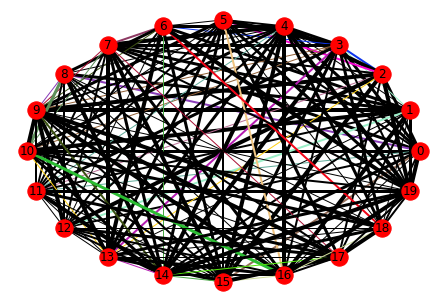

In [60]:
edge_color_list = [net2[e[0]][e[1]]['color'] for e in net2.edges()]
edge_weights_list = [net2[e[0]][e[1]]['weight'] for e in net2.edges()]
nx.draw_circular(net2,node_color='red',edge_color = edge_color_list, with_labels = True, width=edge_weights_list)
plt.show()

In [61]:
caminos_total = np.array(caminos_total)
distancia_total = 0
for i in range(caminos_total.shape[0]):
    for j in range(caminos_total[i].shape[0]-1):
        if (caminos_total[i][j] != caminos_total[i][j+1]):
            distancia_total += net2[caminos_total[i][j]] [caminos_total[i][j+1]]['weight']
f_cost = (distancia_total) + (n3 * 2 * k_no)   

print("La distancia total recorrida es:", distancia_total)
print("Cantidad de autos que sí llegaron a destino:",k_si)
print("Cantidad de autos que no llegaron a destino:",k_no)
print("Distancia promedio de caminos que llegaron a destino:", (distancia_total/k_si))
print("\nFunción de coste =", f_cost)

La distancia total recorrida es: 46
Cantidad de autos que sí llegaron a destino: 20
Cantidad de autos que no llegaron a destino: 0
Distancia promedio de caminos que llegaron a destino: 2.3

Función de coste = 46
